In [18]:
# Importing libraries
import numpy as np
import pandas as pd

In [19]:
DATA_PATH = "Dengue_1000.csv"
data = pd.read_csv(DATA_PATH)
data.head()

,sub_id,sex,age,wgt,Height (in meter ),Body Mass Index (BMI),fever,platelet,hemato,wbc,...,s_rash,headache,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti,hospi,target
0,DEN_0001,M,36,14,NaN,NaN,1,20000,40,6000,...,0,1,1,1,0,0,1,1,1,1
1,DEN_0002,M,48,15,NaN,NaN,1,18000,38,5500,...,0,0,0,1,0,1,0,0,1,1
2,DEN_0003,F,24,12,NaN,NaN,1,13000,45,6300,...,0,1,0,1,0,1,0,0,1,1
3,DEN_0004,M,13,8,NaN,NaN,0,35000,29,7025,...,0,1,0,0,1,1,0,0,1,1
4,DEN_0005,F,19,10,NaN,NaN,0,50000,40,5000,...,0,0,1,0,0,0,0,0,0,0


In [20]:
# Replace 'M' with 1 and 'F' with 2 in the 'Sex' column
data['sex'] = data['sex'].replace({'M': 1, 'F': 2})
# Create a new "height" column by multiplying "weight" by 10
data['hgt'] = data['wgt'] * 10

# Assuming 'wgt' is weight in kilograms and 'hgt' is height in meters
data['bmi'] = data['wgt'] / (data['hgt'] ** 2)

data = data.drop('sub_id', axis=1)
data = data.drop('Height (in meter )', axis=1)
data = data.drop('Body Mass Index (BMI)', axis=1)
data = data.drop('hospi', axis=1)

# Reorder columns to insert "height" next to "weight"
# df = data[['wgt', 'hgt']]



In [21]:
# rearange columns
data = data[['sex', 'age', 'wgt', 'hgt', 'bmi', 'fever', 'platelet', 'hemato', 'wbc', 'j_pain',
       's_rash', 'headache', 'abdo_pain', 'vomit', 'bleed', 'ns1_anti',
       'igm_anti', 'igg_anti', 'target']]
data.head()
# print(data.columns)

,sex,age,wgt,hgt,bmi,fever,platelet,hemato,wbc,j_pain,s_rash,headache,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti,target
0,1,36,14,140,0.000714,1,20000,40,6000,1,0,1,1,1,0,0,1,1,1
1,1,48,15,150,0.000667,1,18000,38,5500,0,0,0,0,1,0,1,0,0,1
2,2,24,12,120,0.000833,1,13000,45,6300,1,0,1,0,1,0,1,0,0,1
3,1,13,8,80,0.001250,0,35000,29,7025,0,0,1,0,0,1,1,0,0,1
4,2,19,10,100,0.001000,0,50000,40,5000,1,0,0,1,0,0,0,0,0,0


In [22]:
x = data.iloc[:,:-1]
# x

y = data.iloc[:, -1]
# y

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=1)
# x_train

In [24]:
from sklearn.ensemble import RandomForestClassifier
Rclf = RandomForestClassifier()
Rclf.fit(x_train, y_train)

print("Accuracy With Random Forest")
Rclf.score(x_test, y_test)

Accuracy With Random Forest


0.95

In [25]:
first_row = x_test.iloc[[12]].copy()
# Rclf.predict(first_row)
first_row

,sex,age,wgt,hgt,bmi,fever,platelet,hemato,wbc,j_pain,s_rash,headache,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti
968,2,111,22,220,0.000455,1,28000,35,7000,0,0,1,0,0,0,0,0,0


In [26]:
# Pickle model 
pd.to_pickle(Rclf,r'd:\DataSoft\Releted\childDisesModelTrain\DenguModel.pickle')

In [27]:
# Rclf.predict(x_test)
# x_test
# x_test.columns
# x=input('To know the potato price,Enter the potato killogram upto 1 : ')
# array = np.array(x) #input converted into 1 dimentional array

# first_row = x_test.iloc[0]

# first_row = x_test.iloc[[12]].copy()

# type(first_row)
# type(x_test)
# first_row_df = first_row.to_frame()

# first_row

# first_row_df
# type(first_row_df)

# Rclf.predict(first_row)
# y_test

# Sample JSON object
# json_object = {
#     "name": "John",
#     "age": 30,
#     "city": "New York",
#     "email": "john@example.com"
# }

# Convert the JSON object to a dataset (DataFrame)
# dataset = pd.DataFrame.from_dict([json_object])

# Print the dataset
# print(dataset)
# type(dataset)

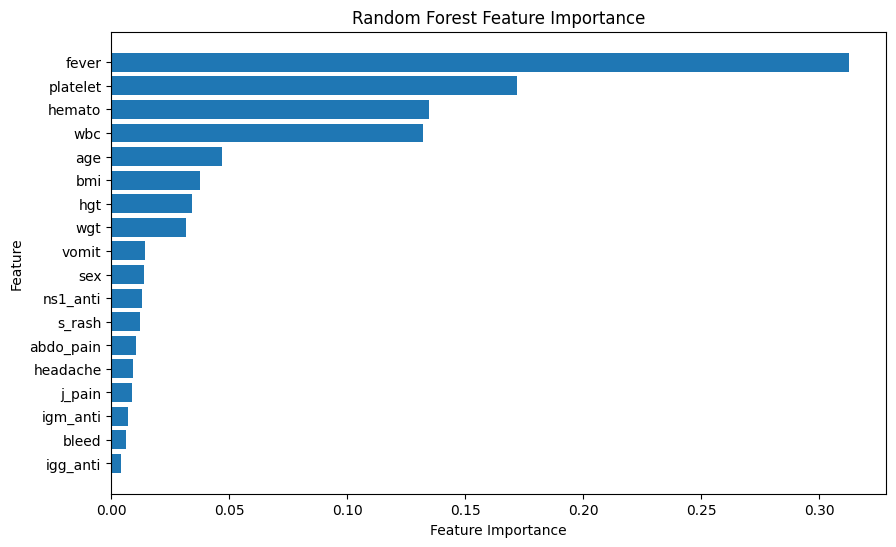

In [28]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = Rclf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()